In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [2]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [3]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [5]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x.copy()
        for i in range(y.size):
            for k in range(randint(0,10)):
                pos=randint(0,N)
                if (x[i,pos]<0.1):
                    x_j[i, pos]=0.0098
                else:
                    x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [6]:
x_n, y_n=make_noise(x,y)

In [7]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [8]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [9]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [10]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [11]:
## Run LR on original features!
#orig_lr2 = LRGD(alpha=10.0, step_size=0.1)
#orig_lr2.fit(x_te, y_te)

In [12]:
#y_hat_Origin=np.asarray(orig_lr2.predict_proba(x_va)[:,1]).reshape(-1)
#tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
#acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
#print("Origin Accuracy", acc)

In [13]:
## Run LR on transformed features!
#new_lr2 = LRGDF(alpha=10.0, step_size=0.1)
#new_lr2.fit(x_te, y_te)

 ## self.feature_transform
 self.feature_transform_pipeline = sklearn.pipeline.Pipeline(
                    [('rescaler', sklearn.preprocessing.MinMaxScaler()),  
                    ('feature_transform', sklearn.pipeline.FeatureUnion(transformer_list=[  
                    ('original_x', sklearn.preprocessing.PolynomialFeatures(degree=1, include_bias=False)),  
                    ('TurnOn_x', TurnOnFeatureExtractor()),  
                    ('TurnOn_x2', TurnOnOnceFeatureExtractor()),  
                    ('TurnOn_all', TurnOnAllFeatureExtractor()),  
                    ('TurnOn_y', TurnOnFeatureExtractorY()),  
                    ('TurnOn_y2', TurnOnOnceFeatureExtractorY()),  
                    ]),

In [14]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

With MinMax Transform
TurnOn Loaded 0.0
(1, 8400)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Shape of Transformed Data (8400, 790)
Initializing w_G with 790 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.031943  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.897277  avg_L1_norm_grad         0.025909  w[0]    0.000 bias    0.000
iter    2/1000000  loss         0.826493  avg_L1_norm_grad         0.019039  w[0]    0.000 bias    0.021
iter    3/1000000  loss         0.779316  avg_L1_norm_grad         0.015787  w[0]    0.000 bias    0.026
iter    4/1000000  loss         0.744214  avg_L1_norm_grad         0.012704  w[0]    0.000 bias    0.041
iter    5/1000000  loss         0.717152  avg_L1_norm_grad         0.011393  w[0]    0.000 bias    0.049
iter    6/1000000  loss         0.694871  avg_L1_norm_grad         0.010064  w[0]   

iter 2900/1000000  loss         0.186294  avg_L1_norm_grad         0.000112  w[0]    0.000 bias    0.981
iter 2901/1000000  loss         0.186291  avg_L1_norm_grad         0.000112  w[0]    0.000 bias    0.981
iter 3000/1000000  loss         0.186052  avg_L1_norm_grad         0.000107  w[0]    0.000 bias    0.981
iter 3001/1000000  loss         0.186050  avg_L1_norm_grad         0.000107  w[0]    0.000 bias    0.981
iter 3100/1000000  loss         0.185829  avg_L1_norm_grad         0.000103  w[0]    0.000 bias    0.982
iter 3101/1000000  loss         0.185827  avg_L1_norm_grad         0.000103  w[0]    0.000 bias    0.982
iter 3200/1000000  loss         0.185623  avg_L1_norm_grad         0.000099  w[0]    0.000 bias    0.982
iter 3201/1000000  loss         0.185621  avg_L1_norm_grad         0.000099  w[0]    0.000 bias    0.982
iter 3300/1000000  loss         0.185432  avg_L1_norm_grad         0.000095  w[0]    0.000 bias    0.983
iter 3301/1000000  loss         0.185430  avg_L1_norm_g

iter 6900/1000000  loss         0.182932  avg_L1_norm_grad         0.000031  w[0]    0.000 bias    1.026
iter 6901/1000000  loss         0.182932  avg_L1_norm_grad         0.000031  w[0]    0.000 bias    1.026
iter 7000/1000000  loss         0.182912  avg_L1_norm_grad         0.000030  w[0]    0.000 bias    1.027
iter 7001/1000000  loss         0.182912  avg_L1_norm_grad         0.000030  w[0]    0.000 bias    1.027
iter 7100/1000000  loss         0.182894  avg_L1_norm_grad         0.000029  w[0]    0.000 bias    1.029
iter 7101/1000000  loss         0.182894  avg_L1_norm_grad         0.000029  w[0]    0.000 bias    1.029
iter 7200/1000000  loss         0.182876  avg_L1_norm_grad         0.000028  w[0]    0.000 bias    1.030
iter 7201/1000000  loss         0.182876  avg_L1_norm_grad         0.000028  w[0]    0.000 bias    1.030
iter 7300/1000000  loss         0.182860  avg_L1_norm_grad         0.000027  w[0]    0.000 bias    1.031
iter 7301/1000000  loss         0.182860  avg_L1_norm_g

iter 10800/1000000  loss         0.182592  avg_L1_norm_grad         0.000012  w[0]    0.000 bias    1.064
iter 10801/1000000  loss         0.182592  avg_L1_norm_grad         0.000012  w[0]    0.000 bias    1.064
iter 10900/1000000  loss         0.182589  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.065
iter 10901/1000000  loss         0.182589  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.065
iter 11000/1000000  loss         0.182587  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.066
iter 11001/1000000  loss         0.182587  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.066
iter 11100/1000000  loss         0.182584  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.066
iter 11101/1000000  loss         0.182584  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.066
iter 11200/1000000  loss         0.182581  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.067
iter 11201/1000000  loss         0.182581  avg

iter   17/1000000  loss         0.593667  avg_L1_norm_grad         0.006510  w[0]    0.000 bias    0.173
iter   18/1000000  loss         0.585674  avg_L1_norm_grad         0.006337  w[0]    0.000 bias    0.182
iter   19/1000000  loss         0.578038  avg_L1_norm_grad         0.006178  w[0]    0.000 bias    0.191
iter  100/1000000  loss         0.354226  avg_L1_norm_grad         0.002238  w[0]    0.000 bias    0.660
iter  101/1000000  loss         0.353157  avg_L1_norm_grad         0.002221  w[0]    0.000 bias    0.664
iter  200/1000000  loss         0.290401  avg_L1_norm_grad         0.001318  w[0]    0.000 bias    0.983
iter  201/1000000  loss         0.290019  avg_L1_norm_grad         0.001313  w[0]    0.000 bias    0.985
iter  300/1000000  loss         0.262677  avg_L1_norm_grad         0.000950  w[0]    0.000 bias    1.201
iter  301/1000000  loss         0.262477  avg_L1_norm_grad         0.000947  w[0]    0.000 bias    1.202
iter  400/1000000  loss         0.246901  avg_L1_norm_g

iter 3900/1000000  loss         0.198331  avg_L1_norm_grad         0.000074  w[0]    0.000 bias    2.210
iter 3901/1000000  loss         0.198330  avg_L1_norm_grad         0.000074  w[0]    0.000 bias    2.210
iter 4000/1000000  loss         0.198237  avg_L1_norm_grad         0.000071  w[0]    0.000 bias    2.210
iter 4001/1000000  loss         0.198236  avg_L1_norm_grad         0.000071  w[0]    0.000 bias    2.210
iter 4100/1000000  loss         0.198148  avg_L1_norm_grad         0.000069  w[0]    0.000 bias    2.211
iter 4101/1000000  loss         0.198148  avg_L1_norm_grad         0.000069  w[0]    0.000 bias    2.211
iter 4200/1000000  loss         0.198066  avg_L1_norm_grad         0.000067  w[0]    0.000 bias    2.212
iter 4201/1000000  loss         0.198066  avg_L1_norm_grad         0.000067  w[0]    0.000 bias    2.212
iter 4300/1000000  loss         0.197990  avg_L1_norm_grad         0.000064  w[0]    0.000 bias    2.212
iter 4301/1000000  loss         0.197989  avg_L1_norm_g

iter 7900/1000000  loss         0.196942  avg_L1_norm_grad         0.000022  w[0]    0.000 bias    2.204
iter 7901/1000000  loss         0.196942  avg_L1_norm_grad         0.000022  w[0]    0.000 bias    2.204
iter 8000/1000000  loss         0.196934  avg_L1_norm_grad         0.000022  w[0]    0.000 bias    2.204
iter 8001/1000000  loss         0.196934  avg_L1_norm_grad         0.000022  w[0]    0.000 bias    2.204
iter 8100/1000000  loss         0.196926  avg_L1_norm_grad         0.000021  w[0]    0.000 bias    2.204
iter 8101/1000000  loss         0.196926  avg_L1_norm_grad         0.000021  w[0]    0.000 bias    2.204
iter 8200/1000000  loss         0.196918  avg_L1_norm_grad         0.000021  w[0]    0.000 bias    2.203
iter 8201/1000000  loss         0.196918  avg_L1_norm_grad         0.000021  w[0]    0.000 bias    2.203
iter 8300/1000000  loss         0.196911  avg_L1_norm_grad         0.000020  w[0]    0.000 bias    2.203
iter 8301/1000000  loss         0.196911  avg_L1_norm_g

In [15]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9577777777777512
TurnOn Loaded 0.0
(1, 3600)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
No Noise New 0.9605555555555289


In [16]:
## Run LR on original features!
orig_lr22 = LRGD(alpha=100.0, step_size=0.1)
orig_lr22.fit(x_te, y_te)
y_hat_Origin=np.asarray(orig_lr22.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

Shape of Transformed Data (84000, 785)
Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.031835  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.905375  avg_L1_norm_grad         0.026133  w[0]   -0.000 bias   -0.000
iter    2/1000000  loss         0.840303  avg_L1_norm_grad         0.018502  w[0]    0.000 bias    0.022
iter    3/1000000  loss         0.797717  avg_L1_norm_grad         0.015796  w[0]    0.000 bias    0.028
iter    4/1000000  loss         0.766286  avg_L1_norm_grad         0.012888  w[0]    0.000 bias    0.043
iter    5/1000000  loss         0.741943  avg_L1_norm_grad         0.011766  w[0]    0.000 bias    0.053
iter    6/1000000  loss         0.721849  avg_L1_norm_grad         0.010498  w[0]    0.000 bias    0.065
iter    7/1000000  loss         0.704570  avg_L1_norm_grad         0.009830  w[0]    0.000 bias    0.075

iter 2901/1000000  loss         0.201171  avg_L1_norm_grad         0.000106  w[0]   -0.000 bias    2.256
iter 3000/1000000  loss         0.200975  avg_L1_norm_grad         0.000102  w[0]   -0.000 bias    2.260
iter 3001/1000000  loss         0.200973  avg_L1_norm_grad         0.000102  w[0]   -0.000 bias    2.260
iter 3100/1000000  loss         0.200794  avg_L1_norm_grad         0.000098  w[0]   -0.000 bias    2.265
iter 3101/1000000  loss         0.200792  avg_L1_norm_grad         0.000098  w[0]   -0.000 bias    2.265
iter 3200/1000000  loss         0.200627  avg_L1_norm_grad         0.000094  w[0]   -0.000 bias    2.269
iter 3201/1000000  loss         0.200626  avg_L1_norm_grad         0.000094  w[0]   -0.000 bias    2.269
iter 3300/1000000  loss         0.200475  avg_L1_norm_grad         0.000090  w[0]   -0.000 bias    2.272
iter 3301/1000000  loss         0.200473  avg_L1_norm_grad         0.000090  w[0]   -0.000 bias    2.272
iter 3400/1000000  loss         0.200334  avg_L1_norm_g

iter 6900/1000000  loss         0.198603  avg_L1_norm_grad         0.000029  w[0]   -0.000 bias    2.291
iter 6901/1000000  loss         0.198603  avg_L1_norm_grad         0.000029  w[0]   -0.000 bias    2.291
iter 7000/1000000  loss         0.198590  avg_L1_norm_grad         0.000028  w[0]   -0.000 bias    2.290
iter 7001/1000000  loss         0.198590  avg_L1_norm_grad         0.000028  w[0]   -0.000 bias    2.290
iter 7100/1000000  loss         0.198578  avg_L1_norm_grad         0.000027  w[0]   -0.000 bias    2.290
iter 7101/1000000  loss         0.198578  avg_L1_norm_grad         0.000027  w[0]   -0.000 bias    2.290
iter 7200/1000000  loss         0.198566  avg_L1_norm_grad         0.000026  w[0]   -0.000 bias    2.290
iter 7201/1000000  loss         0.198566  avg_L1_norm_grad         0.000026  w[0]   -0.000 bias    2.290
iter 7300/1000000  loss         0.198555  avg_L1_norm_grad         0.000026  w[0]   -0.000 bias    2.290
iter 7301/1000000  loss         0.198555  avg_L1_norm_g

In [17]:
## Run LR on transformed features!
new_lr2 = LRGDF(alpha=100.0, step_size=0.1)
new_lr2.fit(x_te, y_te)

With MinMax Transform
TurnOn Loaded 0.0
(1, 84000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Shape of Transformed Data (84000, 790)
Initializing w_G with 790 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.032054  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.895911  avg_L1_norm_grad         0.025763  w[0]   -0.000 bias   -0.000
iter    2/1000000  loss         0.824460  avg_L1_norm_grad         0.018877  w[0]    0.000 bias    0.021
iter    3/1000000  loss         0.777021  avg_L1_norm_grad         0.015585  w[0]    0.000 bias    0.026
iter    4/1000000  loss         0.741881  avg_L1_norm_grad         0.012608  w[0]    0.000 bias    0.041
iter    5/1000000  loss         0.714789  avg_L1_norm_grad         0.011288  w[0]    0.000 bias    0.048
iter    6/1000000  loss         0.692493  avg_L1_norm_grad         0.010008  w[0] 

iter 2900/1000000  loss         0.186689  avg_L1_norm_grad         0.000108  w[0]   -0.020 bias    0.956
iter 2901/1000000  loss         0.186686  avg_L1_norm_grad         0.000108  w[0]   -0.020 bias    0.956
iter 3000/1000000  loss         0.186461  avg_L1_norm_grad         0.000103  w[0]   -0.020 bias    0.956
iter 3001/1000000  loss         0.186459  avg_L1_norm_grad         0.000103  w[0]   -0.020 bias    0.956
iter 3100/1000000  loss         0.186252  avg_L1_norm_grad         0.000099  w[0]   -0.021 bias    0.956
iter 3101/1000000  loss         0.186250  avg_L1_norm_grad         0.000099  w[0]   -0.021 bias    0.956
iter 3200/1000000  loss         0.186058  avg_L1_norm_grad         0.000096  w[0]   -0.021 bias    0.957
iter 3201/1000000  loss         0.186056  avg_L1_norm_grad         0.000096  w[0]   -0.021 bias    0.957
iter 3300/1000000  loss         0.185879  avg_L1_norm_grad         0.000092  w[0]   -0.022 bias    0.957
iter 3301/1000000  loss         0.185877  avg_L1_norm_g

iter 6900/1000000  loss         0.183559  avg_L1_norm_grad         0.000030  w[0]   -0.033 bias    1.000
iter 6901/1000000  loss         0.183558  avg_L1_norm_grad         0.000030  w[0]   -0.033 bias    1.000
iter 7000/1000000  loss         0.183541  avg_L1_norm_grad         0.000029  w[0]   -0.034 bias    1.001
iter 7001/1000000  loss         0.183541  avg_L1_norm_grad         0.000029  w[0]   -0.034 bias    1.001
iter 7100/1000000  loss         0.183524  avg_L1_norm_grad         0.000028  w[0]   -0.034 bias    1.002
iter 7101/1000000  loss         0.183524  avg_L1_norm_grad         0.000028  w[0]   -0.034 bias    1.002
iter 7200/1000000  loss         0.183508  avg_L1_norm_grad         0.000027  w[0]   -0.034 bias    1.004
iter 7201/1000000  loss         0.183508  avg_L1_norm_grad         0.000027  w[0]   -0.034 bias    1.004
iter 7300/1000000  loss         0.183493  avg_L1_norm_grad         0.000026  w[0]   -0.034 bias    1.005
iter 7301/1000000  loss         0.183493  avg_L1_norm_g

iter 10800/1000000  loss         0.183252  avg_L1_norm_grad         0.000011  w[0]   -0.039 bias    1.039
iter 10801/1000000  loss         0.183252  avg_L1_norm_grad         0.000011  w[0]   -0.039 bias    1.039
iter 10900/1000000  loss         0.183249  avg_L1_norm_grad         0.000011  w[0]   -0.039 bias    1.040
iter 10901/1000000  loss         0.183249  avg_L1_norm_grad         0.000011  w[0]   -0.039 bias    1.040
iter 11000/1000000  loss         0.183247  avg_L1_norm_grad         0.000010  w[0]   -0.039 bias    1.041
iter 11001/1000000  loss         0.183247  avg_L1_norm_grad         0.000010  w[0]   -0.039 bias    1.041
iter 11100/1000000  loss         0.183244  avg_L1_norm_grad         0.000010  w[0]   -0.039 bias    1.041
iter 11101/1000000  loss         0.183244  avg_L1_norm_grad         0.000010  w[0]   -0.039 bias    1.041
iter 11200/1000000  loss         0.183242  avg_L1_norm_grad         0.000010  w[0]   -0.039 bias    1.042
iter 11201/1000000  loss         0.183242  avg

In [22]:
## Run LR on transformed features!
new_lr1 = LRGDF(alpha=10.0, step_size=0.1)
new_lr1.fit(x_te, y_te)

With MinMax Transform
TurnOn Loaded 0.0
(1, 84000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Shape of Transformed Data (84000, 790)
Initializing w_G with 790 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.032054  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.895895  avg_L1_norm_grad         0.025763  w[0]   -0.000 bias   -0.000
iter    2/1000000  loss         0.824415  avg_L1_norm_grad         0.018880  w[0]    0.000 bias    0.021
iter    3/1000000  loss         0.776940  avg_L1_norm_grad         0.015590  w[0]    0.000 bias    0.026
iter    4/1000000  loss         0.741764  avg_L1_norm_grad         0.012616  w[0]    0.000 bias    0.041
iter    5/1000000  loss         0.714632  avg_L1_norm_grad         0.011298  w[0]    0.000 bias    0.048
iter    6/1000000  loss         0.692295  avg_L1_norm_grad         0.010019  w[0] 

iter 2900/1000000  loss         0.152564  avg_L1_norm_grad         0.000190  w[0]   -0.025 bias    1.040
iter 2901/1000000  loss         0.152557  avg_L1_norm_grad         0.000190  w[0]   -0.025 bias    1.040
iter 3000/1000000  loss         0.151850  avg_L1_norm_grad         0.000185  w[0]   -0.026 bias    1.041
iter 3001/1000000  loss         0.151843  avg_L1_norm_grad         0.000185  w[0]   -0.026 bias    1.041
iter 3100/1000000  loss         0.151168  avg_L1_norm_grad         0.000181  w[0]   -0.027 bias    1.042
iter 3101/1000000  loss         0.151161  avg_L1_norm_grad         0.000181  w[0]   -0.027 bias    1.042
iter 3200/1000000  loss         0.150515  avg_L1_norm_grad         0.000178  w[0]   -0.027 bias    1.043
iter 3201/1000000  loss         0.150509  avg_L1_norm_grad         0.000178  w[0]   -0.027 bias    1.043
iter 3300/1000000  loss         0.149890  avg_L1_norm_grad         0.000174  w[0]   -0.028 bias    1.044
iter 3301/1000000  loss         0.149884  avg_L1_norm_g

iter 6900/1000000  loss         0.136978  avg_L1_norm_grad         0.000104  w[0]   -0.054 bias    1.135
iter 6901/1000000  loss         0.136976  avg_L1_norm_grad         0.000104  w[0]   -0.054 bias    1.135
iter 7000/1000000  loss         0.136764  avg_L1_norm_grad         0.000103  w[0]   -0.055 bias    1.138
iter 7001/1000000  loss         0.136762  avg_L1_norm_grad         0.000103  w[0]   -0.055 bias    1.139
iter 7100/1000000  loss         0.136555  avg_L1_norm_grad         0.000102  w[0]   -0.056 bias    1.142
iter 7101/1000000  loss         0.136553  avg_L1_norm_grad         0.000102  w[0]   -0.056 bias    1.142
iter 7200/1000000  loss         0.136350  avg_L1_norm_grad         0.000101  w[0]   -0.056 bias    1.145
iter 7201/1000000  loss         0.136348  avg_L1_norm_grad         0.000101  w[0]   -0.056 bias    1.145
iter 7300/1000000  loss         0.136149  avg_L1_norm_grad         0.000100  w[0]   -0.057 bias    1.149
iter 7301/1000000  loss         0.136147  avg_L1_norm_g

iter 10800/1000000  loss         0.130987  avg_L1_norm_grad         0.000073  w[0]   -0.076 bias    1.273
iter 10801/1000000  loss         0.130986  avg_L1_norm_grad         0.000073  w[0]   -0.076 bias    1.273
iter 10900/1000000  loss         0.130878  avg_L1_norm_grad         0.000073  w[0]   -0.077 bias    1.277
iter 10901/1000000  loss         0.130877  avg_L1_norm_grad         0.000073  w[0]   -0.077 bias    1.277
iter 11000/1000000  loss         0.130771  avg_L1_norm_grad         0.000072  w[0]   -0.077 bias    1.280
iter 11001/1000000  loss         0.130770  avg_L1_norm_grad         0.000072  w[0]   -0.077 bias    1.280
iter 11100/1000000  loss         0.130665  avg_L1_norm_grad         0.000072  w[0]   -0.078 bias    1.284
iter 11101/1000000  loss         0.130664  avg_L1_norm_grad         0.000072  w[0]   -0.078 bias    1.284
iter 11200/1000000  loss         0.130561  avg_L1_norm_grad         0.000071  w[0]   -0.078 bias    1.288
iter 11201/1000000  loss         0.130560  avg

iter 14700/1000000  loss         0.127673  avg_L1_norm_grad         0.000056  w[0]   -0.093 bias    1.412
iter 14701/1000000  loss         0.127672  avg_L1_norm_grad         0.000056  w[0]   -0.093 bias    1.412
iter 14800/1000000  loss         0.127607  avg_L1_norm_grad         0.000056  w[0]   -0.094 bias    1.415
iter 14801/1000000  loss         0.127607  avg_L1_norm_grad         0.000056  w[0]   -0.094 bias    1.415
iter 14900/1000000  loss         0.127543  avg_L1_norm_grad         0.000056  w[0]   -0.094 bias    1.419
iter 14901/1000000  loss         0.127542  avg_L1_norm_grad         0.000056  w[0]   -0.094 bias    1.419
iter 15000/1000000  loss         0.127479  avg_L1_norm_grad         0.000055  w[0]   -0.095 bias    1.422
iter 15001/1000000  loss         0.127479  avg_L1_norm_grad         0.000055  w[0]   -0.095 bias    1.422
iter 15100/1000000  loss         0.127416  avg_L1_norm_grad         0.000055  w[0]   -0.095 bias    1.426
iter 15101/1000000  loss         0.127416  avg

iter 18600/1000000  loss         0.125602  avg_L1_norm_grad         0.000045  w[0]   -0.107 bias    1.542
iter 18601/1000000  loss         0.125602  avg_L1_norm_grad         0.000045  w[0]   -0.107 bias    1.542
iter 18700/1000000  loss         0.125560  avg_L1_norm_grad         0.000045  w[0]   -0.107 bias    1.545
iter 18701/1000000  loss         0.125559  avg_L1_norm_grad         0.000045  w[0]   -0.107 bias    1.545
iter 18800/1000000  loss         0.125518  avg_L1_norm_grad         0.000045  w[0]   -0.108 bias    1.548
iter 18801/1000000  loss         0.125517  avg_L1_norm_grad         0.000045  w[0]   -0.108 bias    1.548
iter 18900/1000000  loss         0.125476  avg_L1_norm_grad         0.000044  w[0]   -0.108 bias    1.552
iter 18901/1000000  loss         0.125476  avg_L1_norm_grad         0.000044  w[0]   -0.108 bias    1.552
iter 19000/1000000  loss         0.125435  avg_L1_norm_grad         0.000044  w[0]   -0.108 bias    1.555
iter 19001/1000000  loss         0.125434  avg

iter 22500/1000000  loss         0.124222  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.662
iter 22501/1000000  loss         0.124222  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.662
iter 22600/1000000  loss         0.124193  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.665
iter 22601/1000000  loss         0.124193  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.665
iter 22700/1000000  loss         0.124165  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.668
iter 22701/1000000  loss         0.124164  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.668
iter 22800/1000000  loss         0.124136  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.670
iter 22801/1000000  loss         0.124136  avg_L1_norm_grad         0.000037  w[0]   -0.118 bias    1.670
iter 22900/1000000  loss         0.124108  avg_L1_norm_grad         0.000036  w[0]   -0.119 bias    1.673
iter 22901/1000000  loss         0.124108  avg

iter 26400/1000000  loss         0.123266  avg_L1_norm_grad         0.000031  w[0]   -0.126 bias    1.771
iter 26401/1000000  loss         0.123266  avg_L1_norm_grad         0.000031  w[0]   -0.126 bias    1.771
iter 26500/1000000  loss         0.123245  avg_L1_norm_grad         0.000031  w[0]   -0.126 bias    1.773
iter 26501/1000000  loss         0.123245  avg_L1_norm_grad         0.000031  w[0]   -0.126 bias    1.773
iter 26600/1000000  loss         0.123225  avg_L1_norm_grad         0.000031  w[0]   -0.127 bias    1.776
iter 26601/1000000  loss         0.123225  avg_L1_norm_grad         0.000031  w[0]   -0.127 bias    1.776
iter 26700/1000000  loss         0.123205  avg_L1_norm_grad         0.000031  w[0]   -0.127 bias    1.779
iter 26701/1000000  loss         0.123205  avg_L1_norm_grad         0.000031  w[0]   -0.127 bias    1.779
iter 26800/1000000  loss         0.123185  avg_L1_norm_grad         0.000031  w[0]   -0.127 bias    1.781
iter 26801/1000000  loss         0.123185  avg

iter 30300/1000000  loss         0.122584  avg_L1_norm_grad         0.000026  w[0]   -0.133 bias    1.869
iter 30301/1000000  loss         0.122584  avg_L1_norm_grad         0.000026  w[0]   -0.133 bias    1.869
iter 30400/1000000  loss         0.122569  avg_L1_norm_grad         0.000026  w[0]   -0.133 bias    1.872
iter 30401/1000000  loss         0.122569  avg_L1_norm_grad         0.000026  w[0]   -0.133 bias    1.872
iter 30500/1000000  loss         0.122554  avg_L1_norm_grad         0.000026  w[0]   -0.133 bias    1.874
iter 30501/1000000  loss         0.122554  avg_L1_norm_grad         0.000026  w[0]   -0.133 bias    1.874
iter 30600/1000000  loss         0.122540  avg_L1_norm_grad         0.000026  w[0]   -0.134 bias    1.877
iter 30601/1000000  loss         0.122540  avg_L1_norm_grad         0.000026  w[0]   -0.134 bias    1.877
iter 30700/1000000  loss         0.122526  avg_L1_norm_grad         0.000026  w[0]   -0.134 bias    1.879
iter 30701/1000000  loss         0.122525  avg

iter 34200/1000000  loss         0.122088  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.958
iter 34201/1000000  loss         0.122088  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.958
iter 34300/1000000  loss         0.122077  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.961
iter 34301/1000000  loss         0.122077  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.961
iter 34400/1000000  loss         0.122066  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.963
iter 34401/1000000  loss         0.122066  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.963
iter 34500/1000000  loss         0.122055  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.965
iter 34501/1000000  loss         0.122055  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.965
iter 34600/1000000  loss         0.122045  avg_L1_norm_grad         0.000022  w[0]   -0.139 bias    1.967
iter 34601/1000000  loss         0.122045  avg

iter 38100/1000000  loss         0.121721  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.038
iter 38101/1000000  loss         0.121721  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.038
iter 38200/1000000  loss         0.121713  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.040
iter 38201/1000000  loss         0.121712  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.040
iter 38300/1000000  loss         0.121705  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.042
iter 38301/1000000  loss         0.121704  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.042
iter 38400/1000000  loss         0.121697  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.044
iter 38401/1000000  loss         0.121696  avg_L1_norm_grad         0.000019  w[0]   -0.143 bias    2.044
iter 38500/1000000  loss         0.121689  avg_L1_norm_grad         0.000019  w[0]   -0.144 bias    2.046
iter 38501/1000000  loss         0.121689  avg

iter 42000/1000000  loss         0.121445  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.110
iter 42001/1000000  loss         0.121445  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.110
iter 42100/1000000  loss         0.121439  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.111
iter 42101/1000000  loss         0.121439  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.111
iter 42200/1000000  loss         0.121433  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.113
iter 42201/1000000  loss         0.121433  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.113
iter 42300/1000000  loss         0.121427  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.115
iter 42301/1000000  loss         0.121427  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.115
iter 42400/1000000  loss         0.121421  avg_L1_norm_grad         0.000017  w[0]   -0.147 bias    2.116
iter 42401/1000000  loss         0.121421  avg

iter 45900/1000000  loss         0.121237  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.173
iter 45901/1000000  loss         0.121237  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.173
iter 46000/1000000  loss         0.121232  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.175
iter 46001/1000000  loss         0.121232  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.175
iter 46100/1000000  loss         0.121227  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.176
iter 46101/1000000  loss         0.121227  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.176
iter 46200/1000000  loss         0.121223  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.178
iter 46201/1000000  loss         0.121223  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.178
iter 46300/1000000  loss         0.121218  avg_L1_norm_grad         0.000015  w[0]   -0.150 bias    2.180
iter 46301/1000000  loss         0.121218  avg

iter 49800/1000000  loss         0.121077  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.230
iter 49801/1000000  loss         0.121077  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.230
iter 49900/1000000  loss         0.121073  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.232
iter 49901/1000000  loss         0.121073  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.232
iter 50000/1000000  loss         0.121070  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.233
iter 50001/1000000  loss         0.121070  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.233
iter 50100/1000000  loss         0.121066  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.234
iter 50101/1000000  loss         0.121066  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.234
iter 50200/1000000  loss         0.121063  avg_L1_norm_grad         0.000013  w[0]   -0.152 bias    2.236
iter 50201/1000000  loss         0.121063  avg

iter 53700/1000000  loss         0.120954  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.281
iter 53701/1000000  loss         0.120954  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.281
iter 53800/1000000  loss         0.120951  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.282
iter 53801/1000000  loss         0.120951  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.282
iter 53900/1000000  loss         0.120948  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.283
iter 53901/1000000  loss         0.120948  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.283
iter 54000/1000000  loss         0.120946  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.285
iter 54001/1000000  loss         0.120946  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.285
iter 54100/1000000  loss         0.120943  avg_L1_norm_grad         0.000011  w[0]   -0.154 bias    2.286
iter 54101/1000000  loss         0.120943  avg

iter 57600/1000000  loss         0.120858  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.326
iter 57601/1000000  loss         0.120858  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.326
iter 57700/1000000  loss         0.120856  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.327
iter 57701/1000000  loss         0.120856  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.327
iter 57800/1000000  loss         0.120854  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.328
iter 57801/1000000  loss         0.120854  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.328
iter 57900/1000000  loss         0.120852  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.329
iter 57901/1000000  loss         0.120852  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.329
iter 58000/1000000  loss         0.120850  avg_L1_norm_grad         0.000010  w[0]   -0.156 bias    2.330
iter 58001/1000000  loss         0.120850  avg

iter 61500/1000000  loss         0.120783  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.366
iter 61501/1000000  loss         0.120783  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.366
iter 61600/1000000  loss         0.120782  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.367
iter 61601/1000000  loss         0.120782  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.367
iter 61700/1000000  loss         0.120780  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.368
iter 61701/1000000  loss         0.120780  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.368
iter 61800/1000000  loss         0.120778  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.369
iter 61801/1000000  loss         0.120778  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.369
iter 61900/1000000  loss         0.120777  avg_L1_norm_grad         0.000009  w[0]   -0.157 bias    2.370
iter 61901/1000000  loss         0.120777  avg

iter 65400/1000000  loss         0.120725  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.402
iter 65401/1000000  loss         0.120725  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.402
iter 65500/1000000  loss         0.120723  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.403
iter 65501/1000000  loss         0.120723  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.403
iter 65600/1000000  loss         0.120722  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.404
iter 65601/1000000  loss         0.120722  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.404
iter 65700/1000000  loss         0.120721  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.404
iter 65701/1000000  loss         0.120721  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.404
iter 65800/1000000  loss         0.120719  avg_L1_norm_grad         0.000008  w[0]   -0.158 bias    2.405
iter 65801/1000000  loss         0.120719  avg

iter 69300/1000000  loss         0.120678  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.434
iter 69301/1000000  loss         0.120678  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.434
iter 69400/1000000  loss         0.120677  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.434
iter 69401/1000000  loss         0.120677  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.434
iter 69500/1000000  loss         0.120676  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.435
iter 69501/1000000  loss         0.120676  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.435
iter 69600/1000000  loss         0.120675  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.436
iter 69601/1000000  loss         0.120675  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.436
iter 69700/1000000  loss         0.120674  avg_L1_norm_grad         0.000007  w[0]   -0.159 bias    2.437
iter 69701/1000000  loss         0.120674  avg

iter 73200/1000000  loss         0.120642  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.462
iter 73201/1000000  loss         0.120642  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.462
iter 73300/1000000  loss         0.120641  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.462
iter 73301/1000000  loss         0.120641  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.462
iter 73400/1000000  loss         0.120640  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.463
iter 73401/1000000  loss         0.120640  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.463
iter 73500/1000000  loss         0.120639  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.464
iter 73501/1000000  loss         0.120639  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.464
iter 73600/1000000  loss         0.120638  avg_L1_norm_grad         0.000006  w[0]   -0.160 bias    2.464
iter 73601/1000000  loss         0.120638  avg

In [18]:
y_hat_New=np.asarray(new_lr2.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

TurnOn Loaded 0.0
(1, 36000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
New Accuracy 0.9657777777777751


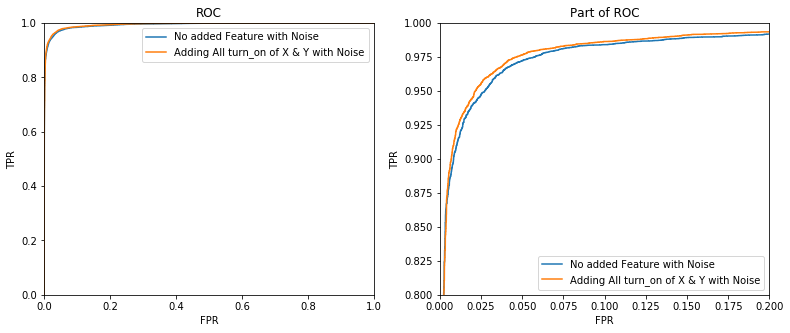

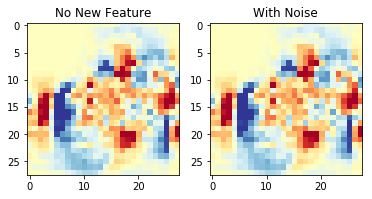

In [28]:
fig2a, axes_arr = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
ax1=axes_arr[0]
ax1.set_title('ROC'); ax1.set_xlabel("FPR"); ax1.set_ylabel("TPR");
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
ax1.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
ax1.plot(fpr3te,tpr3te, label="Adding All turn_on of X & Y with Noise")

#fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
#ax1.plot(fpr1Tte,tpr1Tte, label="No added Feature, No Noise")

#fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
#ax1.plot(fprTte,tprTte, label="Adding All turn_on of X & Y, No Noise")

ax1.set_xlim([-0.0, 1.0]);
ax1.set_ylim([-0.0, 1.0]);
ax1.legend();

ax2=axes_arr[1]
ax2.set_title('Part of ROC'); ax2.set_xlabel("FPR"); ax2.set_ylabel("TPR");
ax2.plot(fpr2te,tpr2te, label="No added Feature with Noise")

ax2.plot(fpr3te,tpr3te, label="Adding All turn_on of X & Y with Noise")

#ax2.plot(fpr1Tte,tpr1Tte, label="No added Feature, No Noise")

#ax2.plot(fprTte,tprTte, label="Adding All turn_on of X & Y, No Noise")

ax2.set_xlim([0.0, 0.2]);
ax2.set_ylim([0.8, 1.0]);
ax2.legend();

fig3b, axes_arr = plt.subplots(nrows=1, ncols=2)
w1=orig_lr22.w_G[:-1]
ax1=axes_arr[0]; ax1.set_title('No New Feature');
ax1.imshow(w1.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')

w2=new_lr1.w_G[:784]
ax2=axes_arr[1]; ax2.set_title('With Noise');
ax2.imshow(w1.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')
plt.show()

In [20]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr2.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

TurnOn Loaded 0.0
(1, 2000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded


In [21]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = orig_lr1.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba11_test.txt', yproba1_test_N)

TurnOn Loaded 0.0
(1, 2000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded


0.415 0.993713

In [21]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = orig_lr1.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba11_test.txt', yproba1_test_N)

TurnOn Loaded 0.0
(1, 2000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded


0.0385 0.993808

In [24]:
#x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr1.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba17N_test.txt', yproba1_test_N)

TurnOn Loaded 0.0
(1, 2000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded


0.0360 0.994828

In [30]:
W11=new_lr1.w_G
np.savetxt('trained_weights/Noise_and_5TurnON_P3_Copy7.txt', yproba1_test_N)